In this project I will be using world suicide rates and world happiness rates to determine if there is a connection between them and if there is a connection how one of them effects the other one. 
The World Suicide rates are given between the years 1987-2015 so I can only compare the years 2015 and 2016. I will make the analysis of the both datas respectively and compare each other.
First lets import the librarys we will use.

## Suice Rate Anlysis

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [2]:
data = pd.read_csv('master.csv')
data

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


My research questions were consists of gdp for year and gdp per capita and generation and population. So we will drop the columns HDI for year and country-year.

In [3]:
wws = data.drop(['HDI for year', 'country-year'], axis=1)

In [4]:
wws[wws['year'] == 2016].country.unique()

array(['Armenia', 'Austria', 'Croatia', 'Cyprus', 'Czech Republic',
       'Grenada', 'Hungary', 'Iceland', 'Lithuania', 'Mauritius',
       'Mongolia', 'Netherlands', 'Qatar', 'Romania', 'Sweden',
       'Thailand'], dtype=object)

In [5]:
wws = wws.drop(wws[(wws['year'] == 2016)].index) #Dropping the year 2016 because there are only 16 countries with have suicide data of 2016.
wws

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z


In [6]:
wws = wws.replace(to_replace=",", value='', regex=True)
wws[' gdp_for_year ($) '] = wws[' gdp_for_year ($) ']
wws[['suicides_no', 'population', 'suicides/100k pop',' gdp_for_year ($) ', 'gdp_per_capita ($)']].describe()

,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27660.000000,2.766000e+04,27660.000000,27660.000000
mean,243.413485,1.850689e+06,12.812597,16815.568330
std,904.490185,3.920658e+06,18.972063,18861.585497
min,0.000000,2.780000e+02,0.000000,251.000000
25%,3.000000,9.753525e+04,0.910000,3436.000000
50%,25.000000,4.307250e+05,5.980000,9283.000000
75%,132.000000,1.491041e+06,16.602500,24796.000000
max,22338.000000,4.380521e+07,224.970000,126352.000000


In [7]:
wws.shape

(27660, 10)

In [8]:
wws.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27660 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27660 non-null  object 
 1   year                27660 non-null  int64  
 2   sex                 27660 non-null  object 
 3   age                 27660 non-null  object 
 4   suicides_no         27660 non-null  int64  
 5   population          27660 non-null  int64  
 6   suicides/100k pop   27660 non-null  float64
 7    gdp_for_year ($)   27660 non-null  object 
 8   gdp_per_capita ($)  27660 non-null  int64  
 9   generation          27660 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 1.8+ MB


The shape of the dataframe. There are 10 columns and 27820 rows for each country for each year and for each age group. Then first lets start with summing the total suicides and total populations for each country.

In [9]:
c = wws.country.unique().tolist()
y = np.sort(wws.year.unique().tolist())
wwscy = pd.DataFrame(columns=['country', 'year', 'suicides', 'population', 'suicides/100k pop', ' gdp_for_year ($) ','gdp_per_capita ($)'])
for i in c:
    for k in y:
            df = wws[(wws['country'] == i) & (wws['year'] == k)]
            year = k
            gdpc = 0
            if len(df['gdp_per_capita ($)']) != 0:
                gdpc = df['gdp_per_capita ($)'].tolist()[-1]
            
            gdpy = 0
            if len(df[' gdp_for_year ($) ']) != 0:
                gdpy = df[' gdp_for_year ($) '].tolist()[-1]
            
            suicides = df['suicides_no'].sum()
            population = df['population'].sum()
            if(population != 0):
                suicides100 = (suicides/population)*100000
                wwscy = wwscy.append({'country' : i,
                              'year' : float(k),
                              'suicides': float(suicides), 
                              'population': float(population),
                              'suicides/100k pop': float(suicides100),
                              ' gdp_for_year ($) ': float(gdpy),          
                              'gdp_per_capita ($)': float(gdpc)}, ignore_index=True)
    
wwscy = wwscy.sort_values(['country', 'year']).reset_index(drop=True)

In [10]:
wwscy

,country,year,suicides,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
0,Albania,1987.0,73.0,2709600.0,2.694125,2.156625e+09,796.0
1,Albania,1988.0,63.0,2764300.0,2.279058,2.126000e+09,769.0
2,Albania,1989.0,68.0,2803100.0,2.425886,2.335125e+09,833.0
3,Albania,1992.0,47.0,2822500.0,1.665190,7.094526e+08,251.0
4,Albania,1993.0,73.0,2807300.0,2.600363,1.228071e+09,437.0
...,...,...,...,...,...,...,...
2300,Uzbekistan,2010.0,1464.0,25651783.0,5.707206,3.933277e+10,1533.0
2301,Uzbekistan,2011.0,1640.0,25978049.0,6.313022,4.591519e+10,1767.0
2302,Uzbekistan,2012.0,1835.0,26381830.0,6.955545,5.182157e+10,1964.0
2303,Uzbekistan,2013.0,1950.0,26838924.0,7.265567,5.769045e+10,2150.0


In [11]:
wwscy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2305 entries, 0 to 2304
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             2305 non-null   object 
 1   year                2305 non-null   float64
 2   suicides            2305 non-null   float64
 3   population          2305 non-null   float64
 4   suicides/100k pop   2305 non-null   float64
 5    gdp_for_year ($)   2305 non-null   float64
 6   gdp_per_capita ($)  2305 non-null   float64
dtypes: float64(6), object(1)
memory usage: 117.1+ KB


I created a new dataframe to keep the country year total suicides and total population for that year.

In [12]:
wwscy_corr = wwscy[['suicides', 'population', 'suicides/100k pop']].corr()
wwscy_corr

,suicides,population,suicides/100k pop
suicides,1.000000,0.808009,0.361538
population,0.808009,1.000000,0.084692
suicides/100k pop,0.361538,0.084692,1.000000


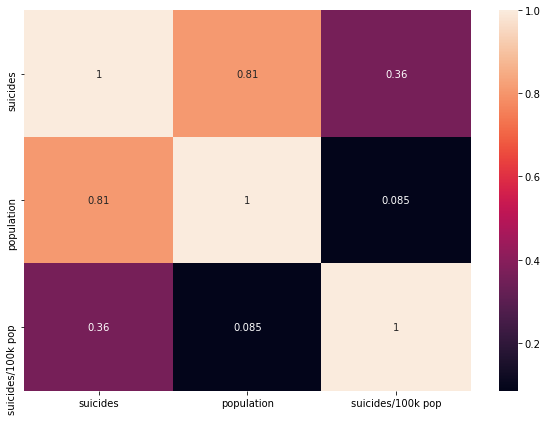

In [13]:
plt.figure(figsize = (10,7))
sns.heatmap(wwscy_corr, annot = True)
plt.show()

With all years and all countries that was in data we plot the heatmap. In the heatmap population and suicides are highly correlated. Suicides and suicidespercentage is normally correlated. When suicides increases suicides percentage increases. When population increases suicides increases. Then when population increses suicides percentage is increses as well.

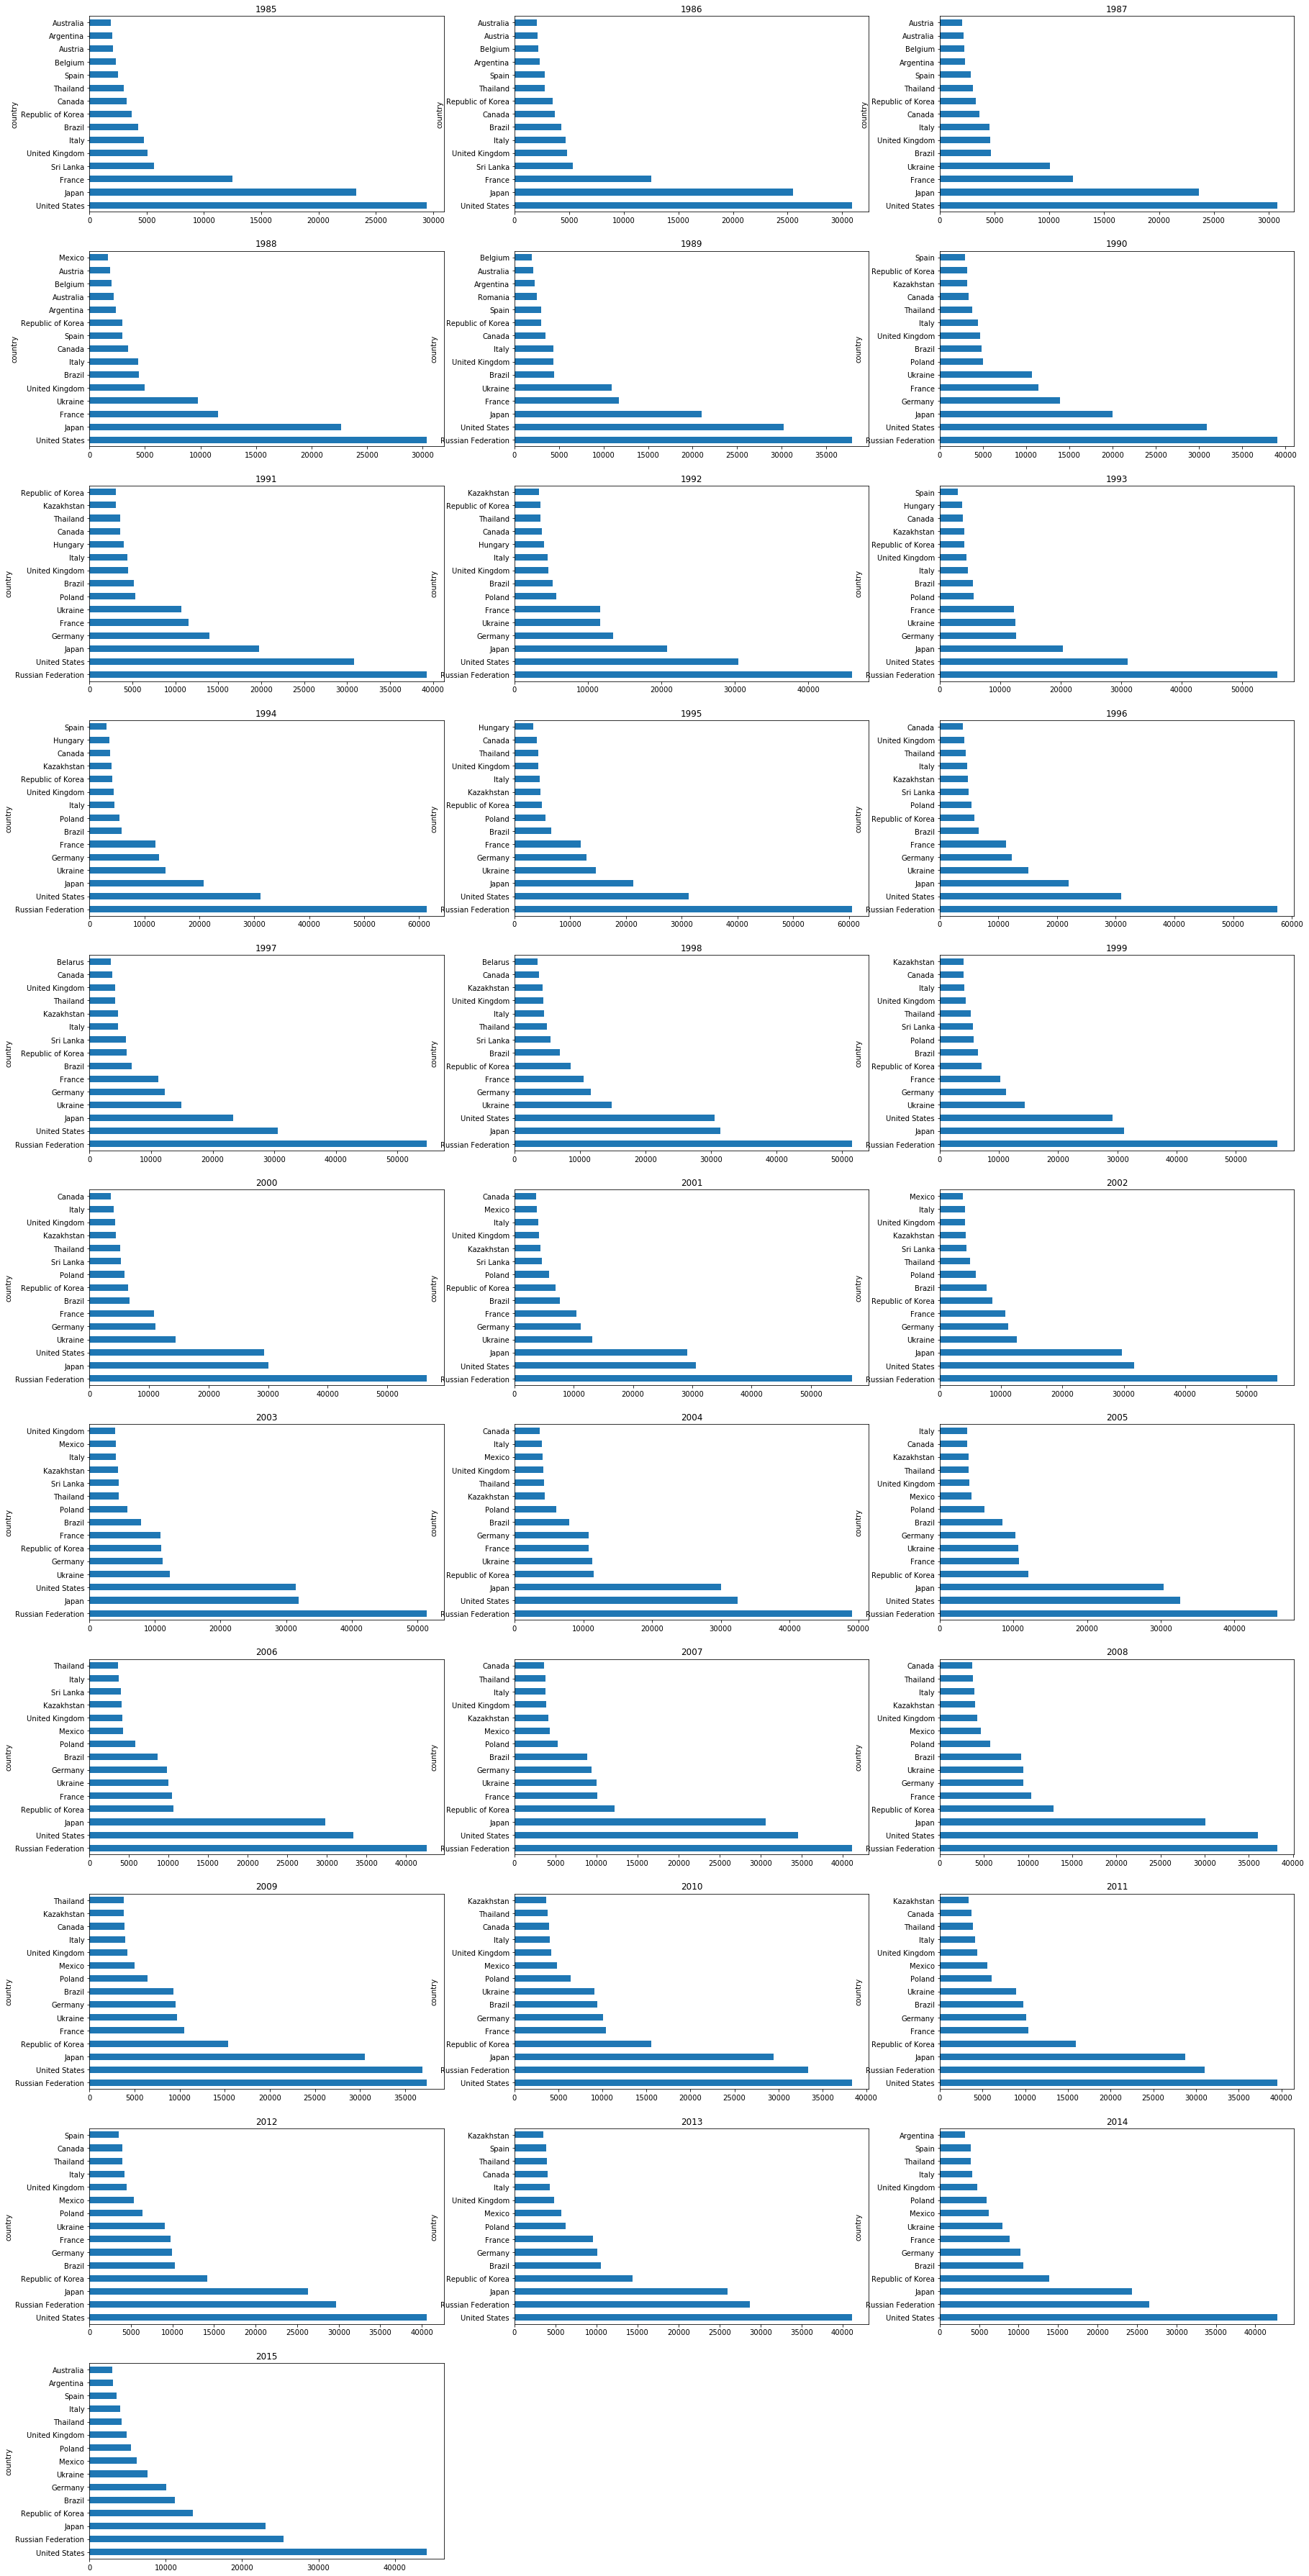

In [14]:
plt.figure(figsize=(30,65))
count = 1
for i in y:
    plt.subplot(11,3,count)
    wwscy[wwscy['year'] == i].groupby(['country']).suicides.sum().nlargest(15).plot(kind='barh')
    plt.title(i) 
    count = count + 1
    
plt.show()

The graph above is showing the top 15 countries that have the most number of suicides in every year. To search the effect of the population I will take the year which has the most suicide count.

In [15]:
wwscy.groupby(['year']).suicides.sum().nlargest(5)

year
1999.0    256119.0
2002.0    256095.0
2003.0    256079.0
2000.0    255832.0
2001.0    250652.0
Name: suicides, dtype: float64

The year which have the most suicide counts is 1999. I will take the top 5 most populated countries in 2015 and take the 5 country which has the most suicide count in 2015. Because I will use the 2015.csv to search a connection between suicide rates and happiness.

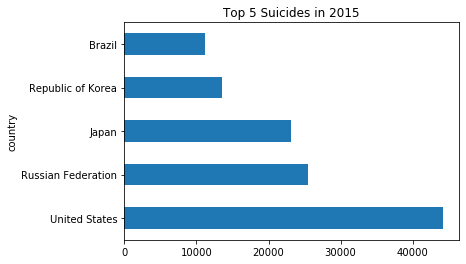

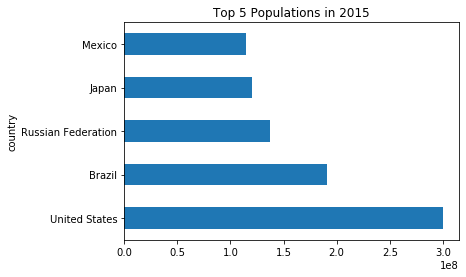

In [16]:
plt.figure()
wwscy[wwscy['year'] == 2015].groupby(['country']).suicides.sum().nlargest(5).plot(kind='barh')
plt.title('Top 5 Suicides in 2015')
plt.show()

plt.figure()
wwscy[wwscy['year'] == 2015].groupby(['country']).population.sum().nlargest(5).plot(kind='barh')
plt.title('Top 5 Populations in 2015')
plt.show()

There are 3 countries that we have in common in both histograms. These are United States, Russian Federation and Japan. The other countries are not in common and the counts in both graphs are not in the exact same order. This means that the population is not a game changer for suicides. But we can not deny that it effects the rates. The answer to my question is the population is actually effects the suicide rate but there is no certain way how it effects the suicide rates.

In [17]:
wwscy_2015 = wwscy[['suicides', 'population', 'suicides/100k pop', ' gdp_for_year ($) ','gdp_per_capita ($)']].where(wwscy['year'] == 2015)

In [18]:
wwscy_2015.describe()

,suicides,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
count,62.000000,6.200000e+01,62.000000,6.200000e+01,62.000000
mean,3284.516129,2.862352e+07,10.852000,7.801531e+11,26231.193548
std,7172.126268,5.132068e+07,6.741193,2.391100e+12,24215.914510
min,0.000000,8.594900e+04,0.000000,7.566667e+08,1285.000000
25%,202.750000,2.894200e+06,5.601742,3.613980e+10,9431.000000
50%,817.500000,8.055944e+06,9.741413,1.811498e+11,15115.500000
75%,2737.000000,3.879636e+07,14.946030,4.927775e+11,42070.750000
max,44189.000000,3.000785e+08,32.535370,1.812071e+13,107456.000000


In [19]:
wws_2015_corr = wwscy_2015.corr()
wws_2015_corr

,suicides,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
suicides,1.000000,0.898503,0.276140,0.864572,0.097748
population,0.898503,1.000000,0.052380,0.823360,0.023982
suicides/100k pop,0.276140,0.052380,1.000000,0.114747,0.129245
gdp_for_year ($),0.864572,0.823360,0.114747,1.000000,0.241677
gdp_per_capita ($),0.097748,0.023982,0.129245,0.241677,1.000000


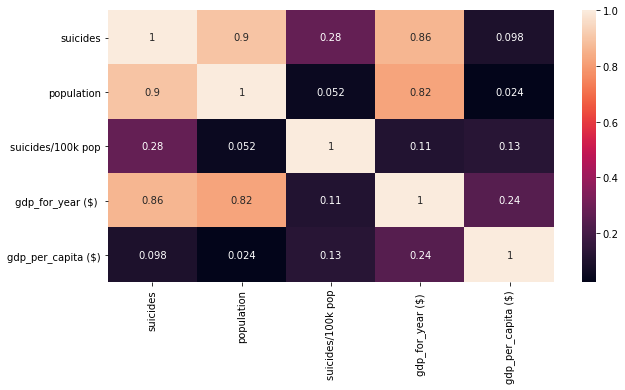

In [20]:
plt.figure(figsize=(10,5))
sns.heatmap(wws_2015_corr, annot=True)

As we can see in the heatmap population and suicides are highly correlated, and there is gdp for year that correlated highly with suicides. So population effects suicides highly. If the population is high the number of suicides will be higher than the other countries. 

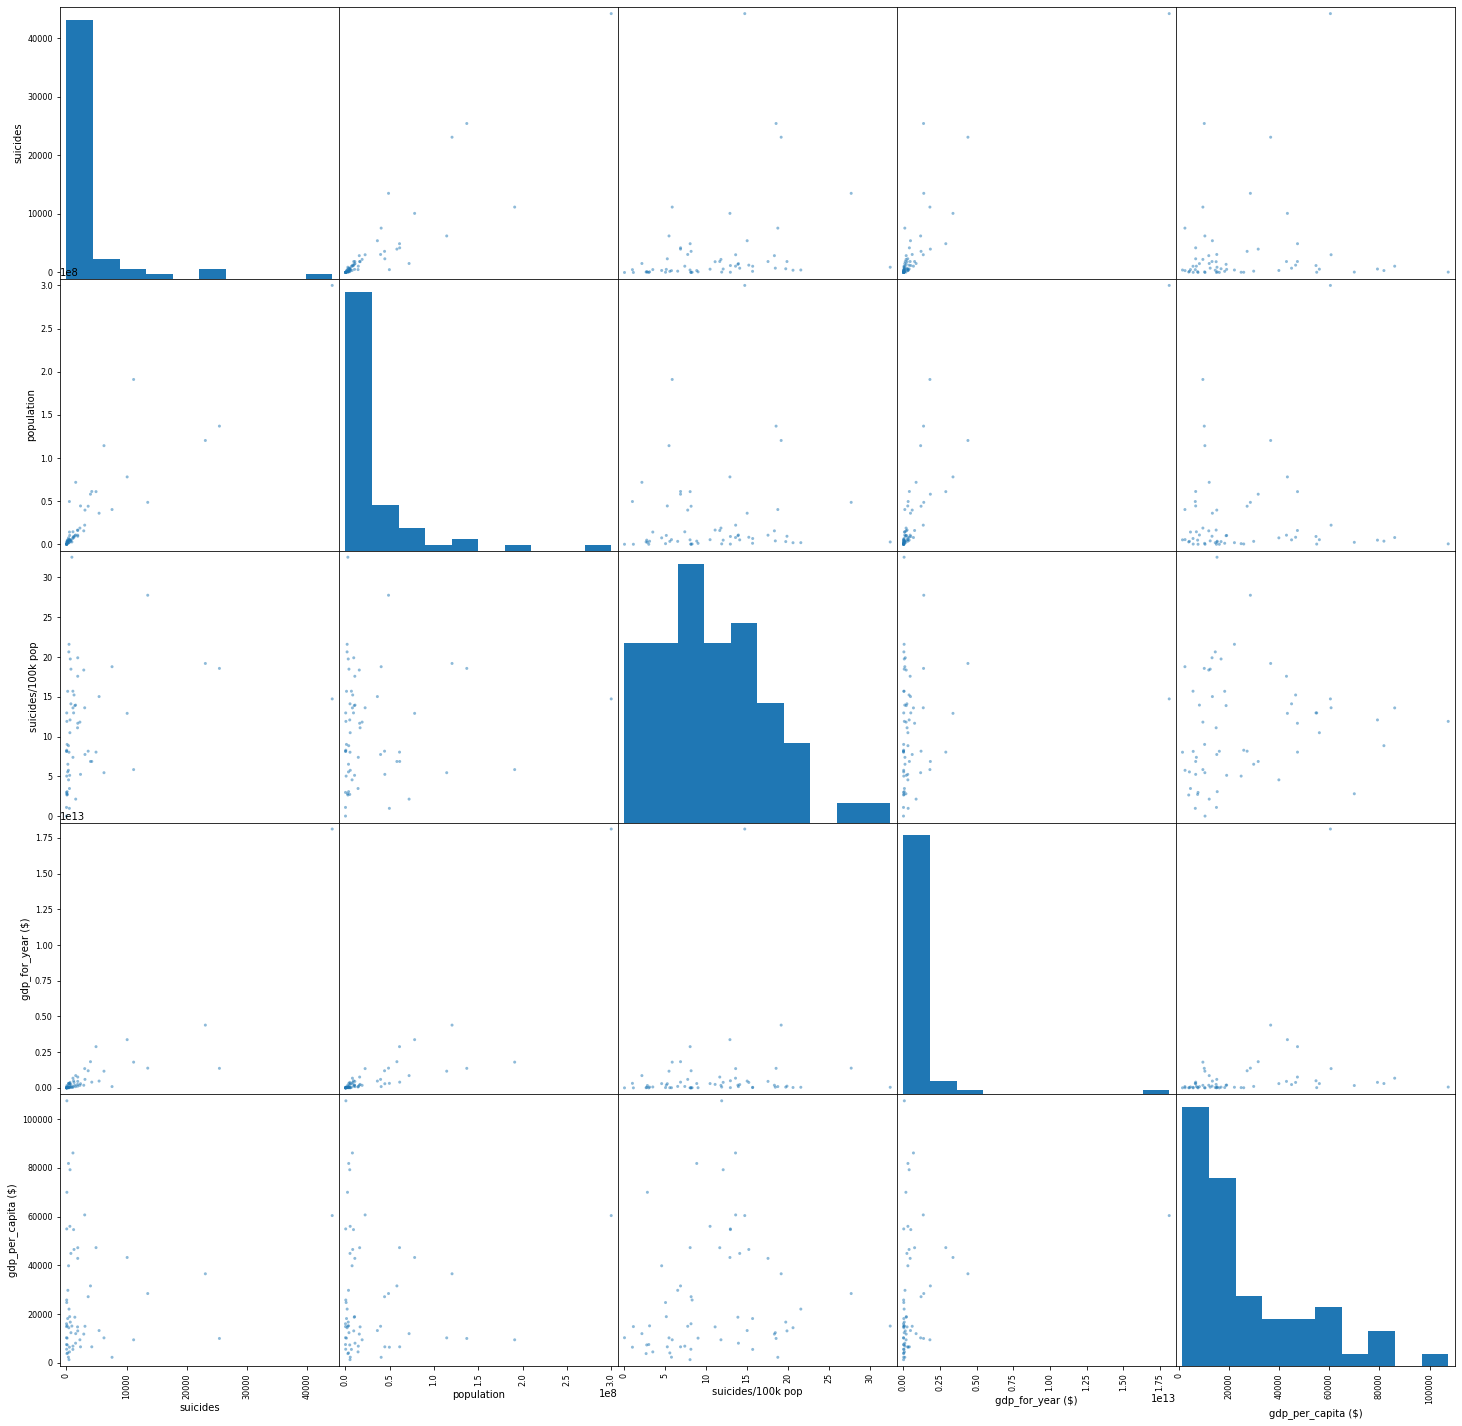

In [21]:
pd.plotting.scatter_matrix(wwscy_2015, figsize=(25,25))
plt.show()

In [22]:
wws['generation'].value_counts()

Generation X       6376
Silent             6332
Millenials         5780
Boomers            4958
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

G.I Generation: 1901 – 1924

Silent: 1925 – 1939

Boomers: 1946 – 1964

Generation X: 1961 – 1981

Millenials: 1981 – 1996

Generation Z: 1997-2012

The Generation X has the most suicide count. The generation X includes 39-59 years old people. 

In [23]:
wws[wws['sex'] == 'female'].describe()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,13830.000000,13830.000000,1.383000e+04,13830.000000,13830.000000
mean,2001.173102,112.509472,1.894824e+06,5.396188,16815.568330
std,8.418906,334.378143,3.980059e+06,7.372062,18861.926472
min,1985.000000,0.000000,4.600000e+02,0.000000,251.000000
25%,1994.000000,1.000000,1.006772e+05,0.410000,3436.000000
50%,2002.000000,14.000000,4.511905e+05,3.160000,9283.000000
75%,2008.000000,73.000000,1.526794e+06,7.410000,24796.000000
max,2015.000000,4053.000000,4.380521e+07,133.420000,126352.000000


In [24]:
wws[wws['sex'] == 'male'].describe()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,13830.000000,13830.000000,1.383000e+04,13830.000000,13830.000000
mean,2001.173102,374.317498,1.806554e+06,20.229007,16815.568330
std,8.418906,1220.729784,3.859983e+06,23.569957,18861.926472
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1994.000000,4.000000,9.450000e+04,2.382500,3436.000000
50%,2002.000000,48.000000,4.113260e+05,13.520000,9283.000000
75%,2008.000000,235.000000,1.445238e+06,27.360000,24796.000000
max,2015.000000,22338.000000,4.313991e+07,224.970000,126352.000000


In [25]:
wws_female = pd.DataFrame(columns=['year', 'suicides'])

for k in y:
    df = wws[(wws['sex'] == 'female') & (wws['year'] == k)]
    suicides = df['suicides_no'].sum()
    wws_female = wws_female.append({'year' : k,
                                    'suicides': suicides}, ignore_index=True)
    
wws_female = wws_female.sort_values(['year'])


wws_male = pd.DataFrame(columns=['year', 'suicides'])

for k in y:
    df = wws[(wws['sex'] == 'male') & (wws['year'] == k)]
    suicides = df['suicides_no'].sum()
    wws_male = wws_male.append({'year' : k,
                                    'suicides': suicides}, ignore_index=True)
    
wws_male = wws_male.sort_values(['year'])

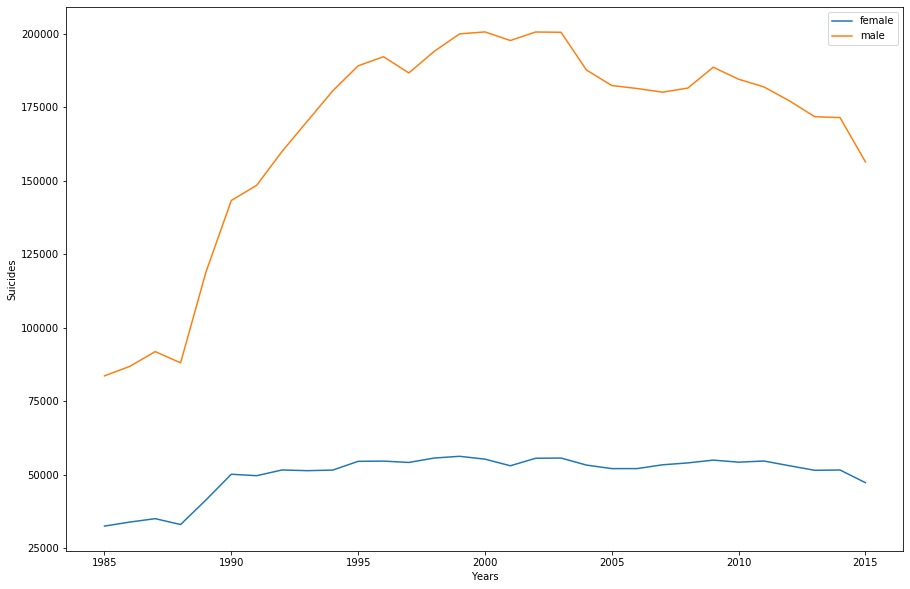

In [26]:
plt.figure(figsize=(15,10))
plt.xlabel('Years')
plt.ylabel('Suicides')
plt.plot(wws_female.set_index('year'), label='female')
plt.plot(wws_male.set_index('year'), label='male')
plt.legend()

As you can see the total male suicide count is grater than female suicide counts in every year. The mean of males who have been commited suicide is larger than the females. 

This answers the question does suicide rate depend on the gender, how? 

- If the population has more males than females, the suicide rate is tend to be larger.
- If male population increases the suicide rates are increases faster.

In [27]:
print("Male-----------------------------------------")    
male_p, male_stat = stats.shapiro(wws_male)
print(male_stat, male_p)
if male_p > 0.05:
	print('Sample looks Normally Distributed.')
else:
	print('Sample does not look Normally Distributed.')    

print()

print("Female-----------------------------------------")    
female_p, female_stat = stats.shapiro(wws_female)
print(female_stat, female_p)
if female_p > 0.05:
	print('Sample looks Normally Distributed.')
else:
	print('Sample does not look Normally Distributed.')    

print()

print("Male vs Female")
ttest, p_value = stats.ttest_ind(wws_female['suicides'], wws_male['suicides'])
print("T-test:", ttest, p_value)
if p_value < 0.05:
    print("We reject the hypothesis. Because of the p value is smaller than the threshold 0.05.")
else:
    print("We accept the hypothesis. Because of the p value is grater than the threshold 0.05.")
    
print()

Male-----------------------------------------
2.9386622024674125e-09 0.7346694469451904
Sample looks Normally Distributed.

Female-----------------------------------------
8.1308565436089e-10 0.7074205875396729
Sample looks Normally Distributed.

Male vs Female
T-test: -17.724608944830216 1.5864829872149973e-25
We reject the hypothesis. Because of the p value is smaller than the threshold 0.05.



The null hypothesis is a type of hypothesis used in statstics that proposes that there is no difference between certain characteristics of a data. Here the null hypothesis becomes does female and male suicides differ by year to year and we reject that null hypothesis. Because we found that male suicides are more than female suicides and the concludes my hypothesis. Males are more suicidal than females.

In [28]:
wwscy

,country,year,suicides,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
0,Albania,1987.0,73.0,2709600.0,2.694125,2.156625e+09,796.0
1,Albania,1988.0,63.0,2764300.0,2.279058,2.126000e+09,769.0
2,Albania,1989.0,68.0,2803100.0,2.425886,2.335125e+09,833.0
3,Albania,1992.0,47.0,2822500.0,1.665190,7.094526e+08,251.0
4,Albania,1993.0,73.0,2807300.0,2.600363,1.228071e+09,437.0
...,...,...,...,...,...,...,...
2300,Uzbekistan,2010.0,1464.0,25651783.0,5.707206,3.933277e+10,1533.0
2301,Uzbekistan,2011.0,1640.0,25978049.0,6.313022,4.591519e+10,1767.0
2302,Uzbekistan,2012.0,1835.0,26381830.0,6.955545,5.182157e+10,1964.0
2303,Uzbekistan,2013.0,1950.0,26838924.0,7.265567,5.769045e+10,2150.0


In [29]:
wwscy_gdp_corr = wwscy[['suicides', 'gdp_per_capita ($)', ' gdp_for_year ($) ', 'suicides/100k pop']].corr()
wwscy_gdp_corr

,suicides,gdp_per_capita ($),gdp_for_year ($),suicides/100k pop
suicides,1.000000,0.095057,0.657498,0.361538
gdp_per_capita ($),0.095057,1.000000,0.304813,0.060788
gdp_for_year ($),0.657498,0.304813,1.000000,0.072238
suicides/100k pop,0.361538,0.060788,0.072238,1.000000


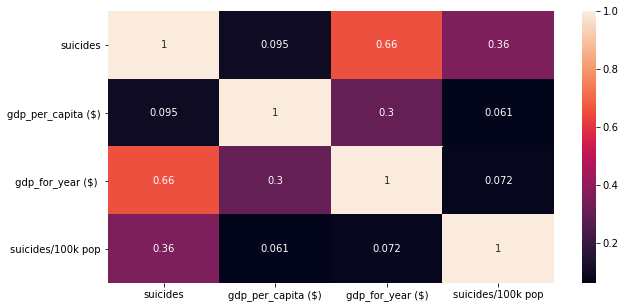

In [30]:
plt.figure(figsize=(10,5))
sns.heatmap(wwscy_gdp_corr, annot=True)
plt.show()

On the table given above we can see that suicides and gdp for year correlate with each other, the correlation number is not so small either. When GDP for year increases suicide rates increase as well. Does this means if a country's economy is good the suicide rates are more? We will see. GDP per capita does not have a noticiable effect on suicides but it increses the suicides nontheless.

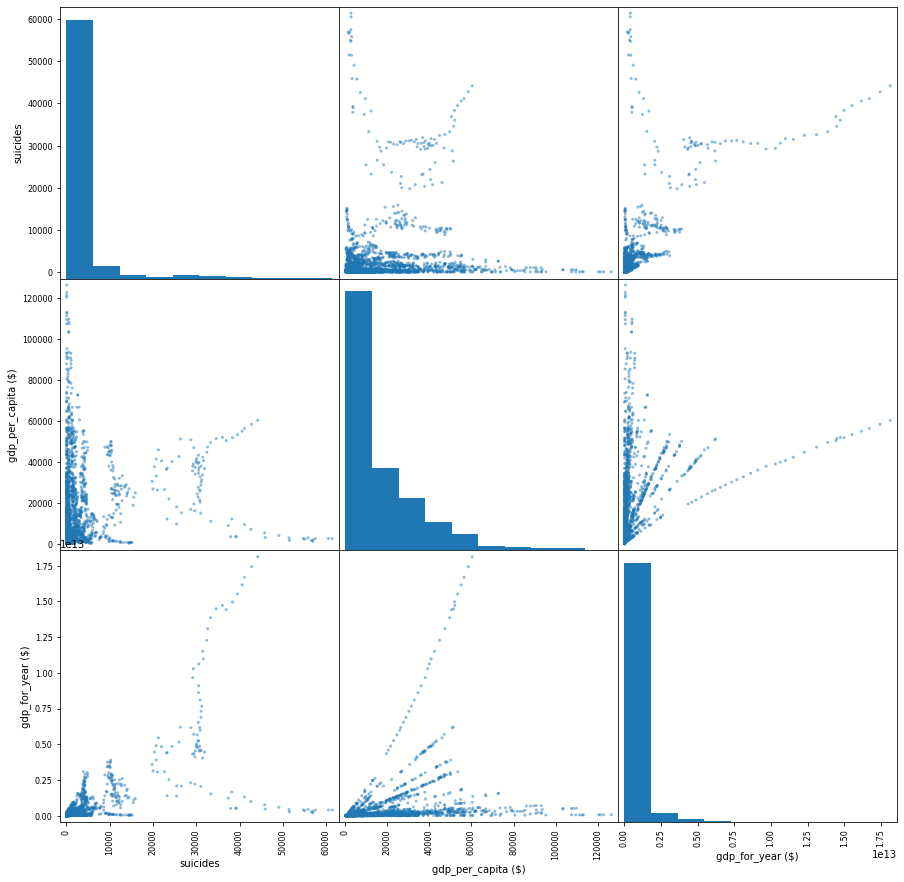

In [31]:
pd.plotting.scatter_matrix(wwscy[['suicides', 'gdp_per_capita ($)', ' gdp_for_year ($) ']], figsize=(15,15))
plt.show()

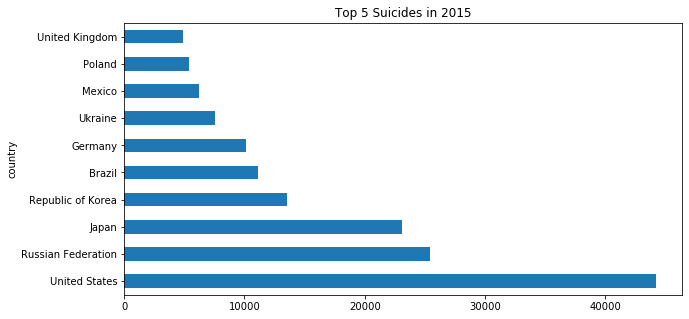

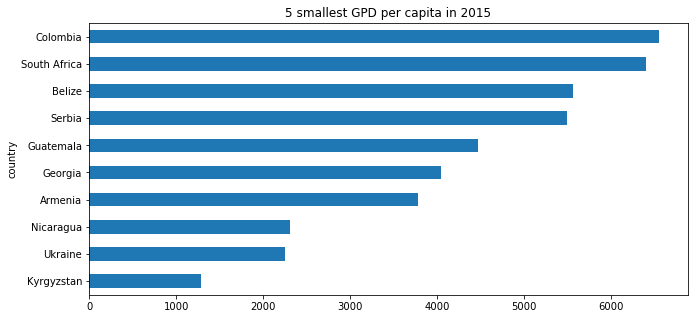

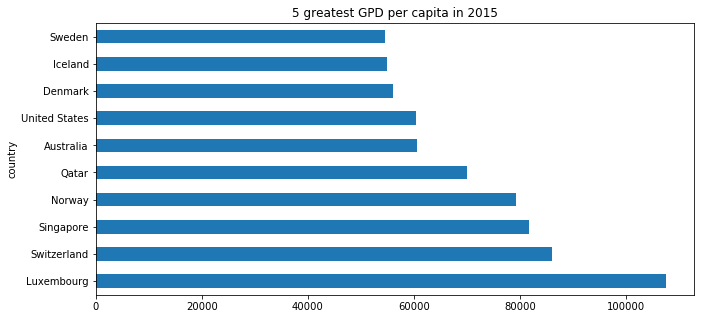

In [32]:
plt.figure(figsize=(10,5))
wwscy[wwscy['year'] == 2015].groupby(['country']).suicides.sum().nlargest(10).plot(kind='barh')
plt.title('Top 5 Suicides in 2015')
plt.show()

plt.figure(figsize=(10.72,5))
wwscy[wwscy['year'] == 2015].groupby(['country'])['gdp_per_capita ($)'].sum().nsmallest(10).plot(kind='barh')
plt.title('5 smallest GPD per capita in 2015')
plt.show()

plt.figure(figsize=(10.72,5))
wwscy[wwscy['year'] == 2015].groupby(['country'])['gdp_per_capita ($)'].sum().nlargest(10).plot(kind='barh')
plt.title('5 greatest GPD per capita in 2015')
plt.show()

We can see the top 10 countries with the most suicide counts, 10 countries with the smallest GDP per capita worldwide and 10 countries with the largest GDP per capita.There are mathching countries in first and second graphs as well as first and third graphs. This means that the economy output of a country that accounts for the number of people does not have a noticeable effect on the suicide rates.

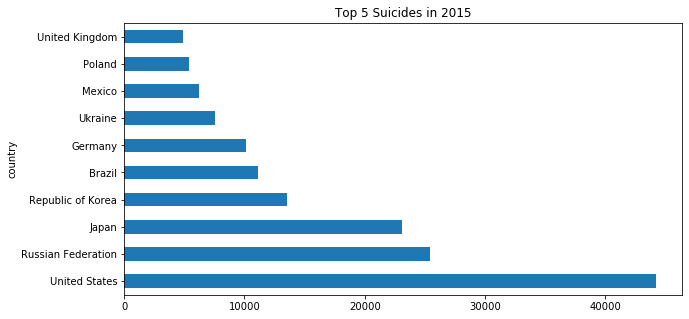

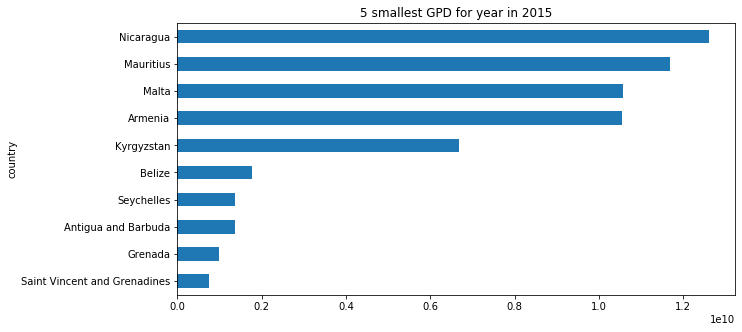

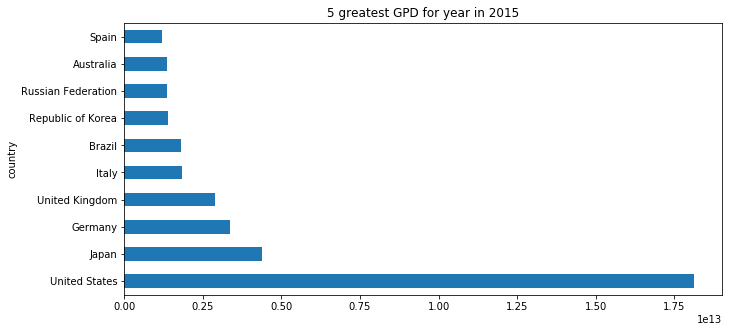

In [33]:
plt.figure(figsize=(10,5))
wwscy[wwscy['year'] == 2015].groupby(['country']).suicides.sum().nlargest(10).plot(kind='barh')
plt.title('Top 5 Suicides in 2015')
plt.show()

plt.figure(figsize=(10,5))
wwscy[wwscy['year'] == 2015].groupby(['country'])[' gdp_for_year ($) '].sum().nsmallest(10).plot(kind='barh')
plt.title('5 smallest GPD for year in 2015')
plt.show()

plt.figure(figsize=(10.72,5))
wwscy[wwscy['year'] == 2015].groupby(['country'])[' gdp_for_year ($) '].sum().nlargest(10).plot(kind='barh')
plt.title('5 greatest GPD for year in 2015')
plt.show()

We can see the top 10 countries with the most suicide counts, 10 countries with the smallest GDP for year worldwide and 10 countries with the largest GDP for year. There is no matching country in first and second graph but there are seven mathcing countries in first and third graph. This means that GDP for year effects suicides more than GDP per capita and it is pretty noticeable. Even though the countrys order is not the same there are seven same countries. This shows that the effect is real and if a country's economy is good the country has more likely to have more suicides.

In [34]:
wwscy.groupby('country').suicides.sum().nlargest(3)

country
Russian Federation    1209742.0
United States         1034013.0
Japan                  806902.0
Name: suicides, dtype: float64

In [35]:
wwscy.sort_values('suicides/100k pop', ascending=False)

,country,year,suicides,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
1248,Lithuania,1996.0,1722.0,3375163.0,51.019758,8.385109e+09,2484.0
1247,Lithuania,1995.0,1694.0,3387149.0,50.012562,7.870782e+09,2324.0
1252,Lithuania,2000.0,1631.0,3315125.0,49.198748,1.153921e+10,3481.0
1249,Lithuania,1997.0,1632.0,3364273.0,48.509737,1.012027e+10,3008.0
1254,Lithuania,2002.0,1551.0,3274488.0,47.366184,1.427836e+10,4360.0
...,...,...,...,...,...,...,...
40,Antigua and Barbuda,2005.0,0.0,80809.0,0.000000,1.022191e+09,12649.0
41,Antigua and Barbuda,2006.0,0.0,81973.0,0.000000,1.157005e+09,14114.0
1103,Jamaica,2006.0,0.0,2512597.0,0.000000,1.190553e+10,4738.0
43,Antigua and Barbuda,2008.0,0.0,84273.0,0.000000,1.368431e+09,16238.0


Now that we know top 3 country that has the most suicides in 1985-2016 Let's predict their suicide numbers for 2016, 2017, 2018, 2019, 2020 and compare them with the data found on the internet.

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

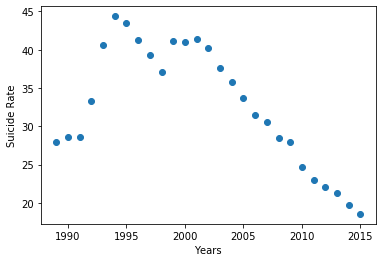

,country,year,suicides,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
1733,Russian Federation,1989.0,37921.0,135443800.0,27.997590,5.065002e+11,3740.0
1734,Russian Federation,1990.0,39028.0,136398200.0,28.613281,5.168143e+11,3789.0
1735,Russian Federation,1991.0,39281.0,137283000.0,28.613157,5.179630e+11,3773.0
1736,Russian Federation,1992.0,45923.0,138118900.0,33.248889,4.602906e+11,3333.0
1737,Russian Federation,1993.0,55846.0,137692800.0,40.558402,4.350837e+11,3160.0
1738,Russian Federation,1994.0,61420.0,138476200.0,44.354192,3.950773e+11,2853.0
1739,Russian Federation,1995.0,60548.0,139087100.0,43.532434,3.955311e+11,2844.0
1740,Russian Federation,1996.0,57511.0,139272600.0,41.293837,3.917200e+11,2813.0
1741,Russian Federation,1997.0,54746.0,139283200.0,39.305530,4.049265e+11,2907.0
1742,Russian Federation,1998.0,51518.0,139122100.0,37.030781,2.709531e+11,1948.0


In [37]:
russia_suicides = wwscy[wwscy['country'] == 'Russian Federation']
y_russia = np.array(russia_suicides['suicides/100k pop']).reshape(-1,1)
X_russia =  np.array(russia_suicides['year']).reshape(-1,1)

plt.scatter(X_russia, y_russia)
plt.ylabel('Suicide Rate')
plt.xlabel('Years')
plt.show()
russia_suicides

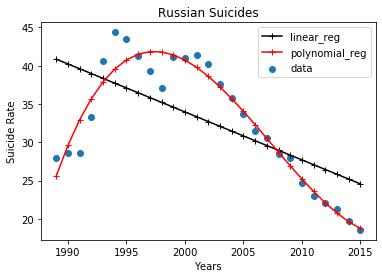

In [38]:
#Linear Regression Model Fitting
lin_reg_russia = LinearRegression()
lin_reg_russia.fit(X_russia, y_russia)
#Polynomial Regression Model Fitting
poly_reg_russia = PolynomialFeatures(degree=3)
X_poly_russia = poly_reg_russia.fit_transform(X_russia)
pol_reg_russia = LinearRegression()
pol_reg_russia.fit(X_poly_russia, y_russia)
linear_pred_russia = lin_reg_russia.predict(X_russia)
poly_pred_russia = pol_reg_russia.predict(poly_reg_russia.fit_transform(X_russia))

plt.scatter(X_russia, y_russia)
plt.plot(X_russia, linear_pred_russia, '+-', color='black')
plt.plot(X_russia, poly_pred_russia, '+-', color='red')
plt.title('Russian Suicides')
plt.xlabel('Years')
plt.ylabel('Suicide Rate')
plt.legend(['linear_reg', 'polynomial_reg', 'data'])
plt.show()

In [74]:
print('Score:', mean_squared_error(y_russia, linear_pred_russia))
print('Score:', mean_squared_error(y_russia, poly_pred_russia))
print('Linear Model Fit Score:', lin_reg_russia.score(X_russia, y_russia))
print('Polynomial Model Fit Score:', pol_reg_russia.score(X_poly_russia, y_russia))

Score: 36.57246570185681
Score: 3.9522804499601722
Linear Model Fit Score: 0.39437539127873267
Polynomial Model Fit Score: 0.9345519025001828


Polynomial Regression predictions are lesser than linear regression predictions with degree 3. Even though 3.9~ error is not good, we can say that polynomial regression is more dependable than linear regression. Let's predict the next four year's suicide rates. Because Polynomial model fit score is greater than linear model fit score polynomial model's predictions are more dependable.

In [40]:
print('Linear Regression Russian Federation Suicide Predictions')
print('2016: ', lin_reg_russia.predict([[2016]]))
print('2017: ', lin_reg_russia.predict([[2017]]))
print('2018: ', lin_reg_russia.predict([[2018]]))
print('2019: ', lin_reg_russia.predict([[2019]]))
print('2020: ', lin_reg_russia.predict([[2020]]))

Linear Regression Russian Federation Suicide Predictions
2016:  [[23.93105385]]
2017:  [[23.30450462]]
2018:  [[22.67795539]]
2019:  [[22.05140616]]
2020:  [[21.42485693]]


In [41]:
print('Polynomial Regression Russian Federation Suicide Predictions')
print('2016: ', pol_reg_russia.predict(poly_reg_russia.fit_transform([[2016]])))
print('2017: ', pol_reg_russia.predict(poly_reg_russia.fit_transform([[2017]])))
print('2018: ', pol_reg_russia.predict(poly_reg_russia.fit_transform([[2018]])))
print('2019: ', pol_reg_russia.predict(poly_reg_russia.fit_transform([[2019]])))
print('2020: ', pol_reg_russia.predict(poly_reg_russia.fit_transform([[2020]])))

Polynomial Regression Russian Federation Suicide Predictions
2016:  [[18.12961082]]
2017:  [[17.83395724]]
2018:  [[17.88684137]]
2019:  [[18.32445513]]
2020:  [[19.18299051]]


#### Real Numbers: 
- 2016: 15,8
- 2017: 13,8 
- 2020: 18.5

Only real values I could find in internet was 2016 and 2017 and the rates are dropping little by little. The predictions shows that there will be increase in suicide rates but dependability is not that great because of lacking data.

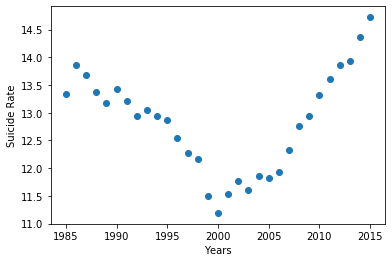

In [42]:
us_suicides = wwscy[wwscy['country'] == 'United States']
y_us = np.array(us_suicides['suicides/100k pop']).reshape(-1,1)
X_us = np.array(us_suicides['year']).reshape(-1,1)

plt.scatter(X_us,y_us)
plt.ylabel('Suicide Rate')
plt.xlabel('Years')
plt.show()

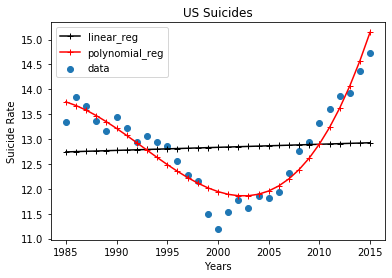

In [43]:
#Linear Regression Model Fitting
lin_reg_us = LinearRegression()
lin_reg_us.fit(X_us, y_us)
#Polynomial Regression Model Fitting
poly_reg_us = PolynomialFeatures(degree=3)
X_poly_us = poly_reg_us.fit_transform(X_us)
pol_reg_us = LinearRegression()
pol_reg_us.fit(X_poly_us, y_us)
linear_pred_us = lin_reg_us.predict(X_us)
poly_pred_us = pol_reg_us.predict(poly_reg_us.fit_transform(X_us))

plt.scatter(X_us, y_us)
plt.plot(X_us, lin_reg_us.predict(X_us), '+-', color='black')
plt.plot(X_us, pol_reg_us.predict(poly_reg_us.fit_transform(X_us)), '+-', color='red')
plt.title('US Suicides')
plt.xlabel('Years')
plt.ylabel('Suicide Rate')
plt.legend(['linear_reg', 'polynomial_reg', 'data'])
plt.show()

In [76]:
print('Linear Regression Mean Squared Error:', mean_squared_error(y_us, linear_pred_us))
print('Polynomial Regression Mean Squared Error:', mean_squared_error(y_us, poly_pred_us))
print('Linear Model Fit Score:', lin_reg_us.score(X_us, y_us))
print('Polynomial Model Fit Score:', pol_reg_us.score(X_poly_us, y_us))

Linear Regression Mean Squared Error: 0.7943879697822286
Polynomial Regression Mean Squared Error: 0.08487315525031601
Linear Model Fit Score: 0.0037934032743084374
Polynomial Model Fit Score: 0.8935643534877962


Polynomial Regression predictions are lesser than linear regression predictions and it is close to zero with degree 3. We can say that polynomial regression is more dependable than linear regression. Let's predict the next four year's suicide rates. Because Polynomial model fit score is greater than linear model fit score polynomial model's predictions are more dependable.

In [45]:
print('Linear Regression US Suicide Predictions')
print('2016: ', lin_reg_us.predict([[2016]]))
print('2017: ', lin_reg_us.predict([[2017]]))
print('2018: ', lin_reg_us.predict([[2018]]))
print('2019: ', lin_reg_us.predict([[2019]]))
print('2020: ', lin_reg_us.predict([[2020]]))

Linear Regression US Suicide Predictions
2016:  [[12.93368851]]
2017:  [[12.9398376]]
2018:  [[12.94598669]]
2019:  [[12.95213579]]
2020:  [[12.95828488]]


In [46]:
print('Polynomial Regression US Suicide Predictions')
print('2016: ', pol_reg_us.predict(poly_reg_us.fit_transform([[2016]])))
print('2017: ', pol_reg_us.predict(poly_reg_us.fit_transform([[2017]])))
print('2018: ', pol_reg_us.predict(poly_reg_us.fit_transform([[2018]])))
print('2019: ', pol_reg_us.predict(poly_reg_us.fit_transform([[2019]])))
print('2020: ', pol_reg_us.predict(poly_reg_us.fit_transform([[2020]])))

Polynomial Regression US Suicide Predictions
2016:  [[15.78726177]]
2017:  [[16.49639578]]
2018:  [[17.27866712]]
2019:  [[18.1370691]]
2020:  [[19.07459503]]


#### Real Numbers: 
- 2016: 13,4
- 2017: 13,7
- 2018: 13,9
- 2019: 14,5
- 2020: 15,3

The predicted values are not so close to the real values but not so far either. Our error rate for the prediction was close to zero but that number for the test predictions. Either way I think these predictions are not so bad. But the data is small to make a prediction the predictions can fail easily.

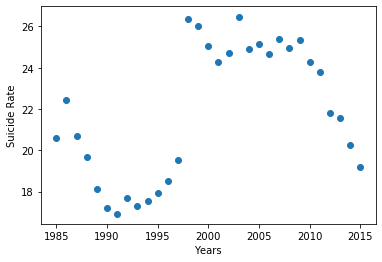

In [47]:
japan_suicides = wwscy[wwscy['country'] == 'Japan']
y_japan = np.array(japan_suicides['suicides/100k pop']).reshape(-1,1)
X_japan = np.array(japan_suicides['year']).reshape(-1,1)

plt.scatter(X_japan,y_japan)
plt.ylabel('Suicide Rate')
plt.xlabel('Years')
plt.show()

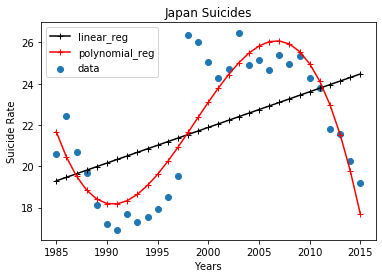

In [48]:
#Linear Regression Model Fitting
lin_reg_japan = LinearRegression()
lin_reg_japan.fit(X_japan, y_japan)
#Polynomial Regression Model Fitting
poly_reg_japan = PolynomialFeatures(degree=3)
X_poly_japan = poly_reg_japan.fit_transform(X_japan)
pol_reg_japan = LinearRegression()
pol_reg_japan.fit(X_poly_japan, y_japan)
linear_pred_japan = lin_reg_japan.predict(X_japan)
poly_pred_japan = pol_reg_japan.predict(poly_reg_japan.fit_transform(X_japan))

plt.scatter(X_japan, y_japan)
plt.plot(X_japan, lin_reg_japan.predict(X_japan), '+-', color='black')
plt.plot(X_japan, pol_reg_japan.predict(poly_reg_japan.fit_transform(X_japan)), '+-', color='red')
plt.title('Japan Suicides')
plt.xlabel('Years')
plt.ylabel('Suicide Rate')
plt.legend(['linear_reg', 'polynomial_reg', 'data'])
plt.show()

In [75]:
print('Score:', mean_squared_error(y_japan, linear_pred_japan))
print('Score:', mean_squared_error(y_japan, poly_pred_japan))
print('Linear Model Fit Score:', lin_reg_japan.score(X_japan, y_japan))
print('Polynomial Model Fit Score:', pol_reg_japan.score(X_poly_japan, y_japan))

Score: 7.9672895229168885
Score: 2.3290941273400003
Linear Model Fit Score: 0.23041579402526066
Polynomial Model Fit Score: 0.7750258667676535


Polynomial Regression predictions are lesser than linear regression predictions with degree 3. We can say that polynomial regression is more dependable than linear regression. Let's predict the next four year's suicide rates. Because Polynomial model fit score is greater than linear model fit score polynomial model's predictions are more dependable.

In [50]:
print('Linear Regression US Suicide Predictions')
print('2016: ', lin_reg_japan.predict([[2016]]))
print('2017: ', lin_reg_japan.predict([[2017]]))
print('2018: ', lin_reg_japan.predict([[2018]]))
print('2019: ', lin_reg_japan.predict([[2019]]))
print('2020: ', lin_reg_japan.predict([[2020]]))

Linear Regression US Suicide Predictions
2016:  [[24.64905975]]
2017:  [[24.82173828]]
2018:  [[24.99441682]]
2019:  [[25.16709535]]
2020:  [[25.33977389]]


In [51]:
print('Polynomial Regression US Suicide Predictions')
print('2016: ', pol_reg_japan.predict(poly_reg_japan.fit_transform([[2016]])))
print('2017: ', pol_reg_japan.predict(poly_reg_japan.fit_transform([[2017]])))
print('2018: ', pol_reg_japan.predict(poly_reg_japan.fit_transform([[2018]])))
print('2019: ', pol_reg_japan.predict(poly_reg_japan.fit_transform([[2019]])))
print('2020: ', pol_reg_japan.predict(poly_reg_japan.fit_transform([[2020]])))

Polynomial Regression US Suicide Predictions
2016:  [[15.19042966]]
2017:  [[12.31863264]]
2018:  [[9.03127222]]
2019:  [[5.30569727]]
2020:  [[1.11925653]]


#### Real Numbers
- 2016: 17,3
- 2017: 16,8
- 2018: 16,5
- 2019: 16
- 2020: 18,5

The data shows that there is a big drop in the latest years of japan. That is correct but the suicide rates slowed down and the prediction couldn't predict the slowing of the suicide rates. The error of polynomial regression is not great but because of the data being so small to make a prediction is showing its effects on the next years predictions.

### Referances to Real Values:
- https://en.wikipedia.org/wiki/Suicide_in_Russia
- https://worldpopulationreview.com/countries/suicide-rate-by-country/
- https://www.americashealthrankings.org/explore/annual/measure/Suicide/state/ALL
- https://www.statista.com/statistics/622249/japan-suicide-number-per-100-000-inhabitants/

## Happiness Report Analysis

In [52]:
happiness = pd.read_csv('2015.csv')
happiness.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [53]:
happiness.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


Let's check the correlations to determine which column makes a country happy from the other columns.

In [54]:
happiness_corr = happiness[['Economy (GDP per Capita)', 'Family', 'Freedom', 'Health (Life Expectancy)', 'Trust (Government Corruption)', 'Happiness Score']].corr()
happiness_corr

,Economy (GDP per Capita),Family,Freedom,Health (Life Expectancy),Trust (Government Corruption),Happiness Score
Economy (GDP per Capita),1.000000,0.645299,0.370300,0.816478,0.307885,0.780966
Family,0.645299,1.000000,0.441518,0.531104,0.205605,0.740605
Freedom,0.370300,0.441518,1.000000,0.360477,0.493524,0.568211
Health (Life Expectancy),0.816478,0.531104,0.360477,1.000000,0.248335,0.724200
Trust (Government Corruption),0.307885,0.205605,0.493524,0.248335,1.000000,0.395199
Happiness Score,0.780966,0.740605,0.568211,0.724200,0.395199,1.000000


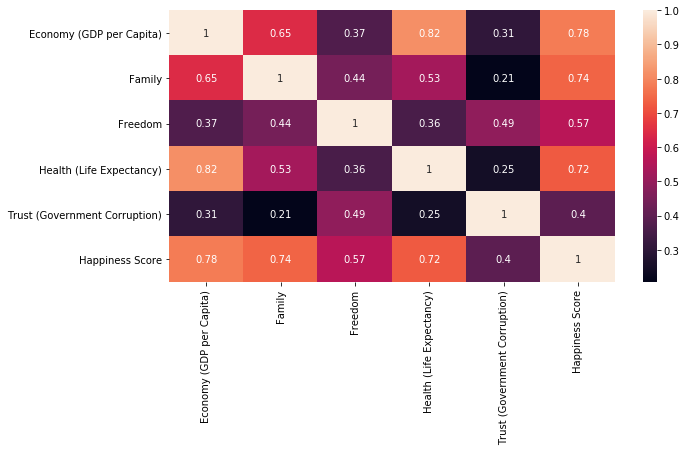

In [55]:
plt.figure(figsize=(10,5))
sns.heatmap(happiness_corr, annot=True)

As we can see in the heatmap Family, Economy, Health columns strongly correlates with happiness score. The economy makes a country happier than the other columns but Familiy and health is close too. These three makes people happy in a country the most. I already analysed the effect that gdp per capita makes to the suicide rates of a country and the answer to that was there was no noticeable effect what so ever. Does This means that happiness score of a country does not effect the suicides? Let us see.

In [56]:
wwscy_2015.sort_values('suicides', ascending=False).reset_index()

,index,suicides,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($)
0,2254,44189.0,300078511.0,14.725813,1.812071e+13,60387.0
1,1759,25432.0,137018943.0,18.560937,1.368401e+12,9987.0
2,1137,23092.0,120376310.0,19.183176,4.394978e+12,36510.0
3,1705,13510.0,48671752.0,27.757374,1.382764e+12,28410.0
4,376,11163.0,191087085.0,5.841839,1.802214e+12,9431.0
...,...,...,...,...,...,...
2300,2300,NaN,NaN,NaN,NaN,NaN
2301,2301,NaN,NaN,NaN,NaN,NaN
2302,2302,NaN,NaN,NaN,NaN,NaN
2303,2303,NaN,NaN,NaN,NaN,NaN


In [57]:
wws_2015_countries = wwscy.country.where(wwscy.year == 2015).unique().tolist()
wwscy.country.where(wwscy.year == 2015).unique()

array([nan, 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Belgium', 'Belize', 'Brazil', 'Chile', 'Colombia',
       'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark',
       'Ecuador', 'Estonia', 'Finland', 'Georgia', 'Germany', 'Greece',
       'Grenada', 'Guatemala', 'Hungary', 'Iceland', 'Israel', 'Italy',
       'Japan', 'Kazakhstan', 'Kyrgyzstan', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malta', 'Mauritius', 'Mexico', 'Netherlands',
       'Nicaragua', 'Norway', 'Panama', 'Poland', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', 'Russian Federation',
       'Saint Vincent and Grenadines', 'Serbia', 'Seychelles',
       'Singapore', 'Slovenia', 'South Africa', 'Spain', 'Sweden',
       'Switzerland', 'Thailand', 'Turkey', 'Turkmenistan', 'Ukraine',
       'United Kingdom', 'United States', 'Uruguay'], dtype=object)

In [58]:
happiness_countries = happiness.Country.unique().tolist()
happiness.Country.unique()

array(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland',
       'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel',
       'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil',
       'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates',
       'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama',
       'Germany', 'Chile', 'Qatar', 'France', 'Argentina',
       'Czech Republic', 'Uruguay', 'Colombia', 'Thailand',
       'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname',
       'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan',
       'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy',
       'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia',
       'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia',
       'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus',
       'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong',
       'Estonia', 'Indonesi

I will create another dataframe which includes happines score, happiness rank, and suicides with the matching countries in both datasets. There are many countries that are not in the other dataframe to make an analysis.

In [59]:
dataframe = pd.DataFrame(columns = ['Country', 'Happiness Score', 'Suicides', 'Suicide Rate'])

for i in wws_2015_countries:
    for j in happiness_countries:
        if i == j:
            df = wwscy[(wwscy['country'] == i) & (wwscy['year'] == 2015)]
            df1 = happiness[happiness['Country'] == j]         
            hs = df1['Happiness Score'].tolist()[-1]
            s = df['suicides'].tolist()[-1]
            sp = df['suicides/100k pop'].tolist()[-1]
            dataframe = dataframe.append({'Country': i,
                                          'Happiness Score': hs,
                                          'Suicides': s,
                                          'Suicide Rate': sp}, ignore_index = True)

dataframe = dataframe.sort_values('Happiness Score', ascending=False).reset_index(drop = True)
dataframe.head()

,Country,Happiness Score,Suicides,Suicide Rate
0,Switzerland,7.587,1073.0,13.595182
1,Iceland,7.561,40.0,12.963695
2,Denmark,7.527,564.0,10.477312
3,Norway,7.522,590.0,12.082961
4,Finland,7.406,731.0,14.107075


In [60]:
dataframe.shape

(53, 4)

In [61]:
dataframe.sort_values('Suicides').head()

,Country,Happiness Score,Suicides,Suicide Rate
27,Malta,6.302,34.0,8.279819
1,Iceland,7.561,40.0,12.963695
38,Cyprus,5.689,40.0,5.024892
13,Luxembourg,6.946,64.0,11.901485
20,Qatar,6.611,66.0,2.803563


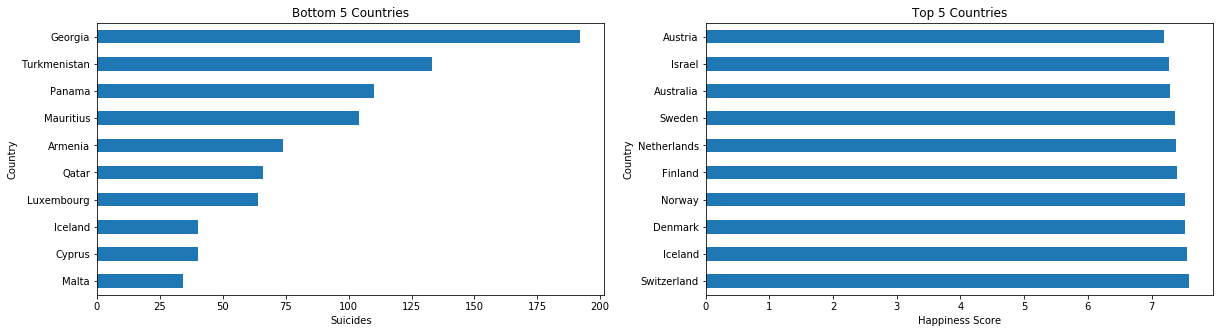

In [62]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
dataframe.groupby(['Country']).Suicides.sum().nsmallest(10).plot(kind = 'barh')
plt.xlabel('Suicides')
plt.title('Bottom 5 Countries')
plt.subplot(1,2,2)
dataframe.groupby(['Country'])['Happiness Score'].sum().nlargest(10).plot(kind = 'barh')
plt.xlabel('Happiness Score')
plt.title('Top 5 Countries')
plt.show()

In the above graphs only 1 country matches. So we can't say for certain that happiness score effects suicides.

In [63]:
dataframe.sort_values('Suicides').tail()

,Country,Happiness Score,Suicides,Suicide Rate
49,Ukraine,4.681,7574.0,18.772875
18,Germany,6.750,10088.0,12.910709
12,Brazil,6.983,11163.0,5.841839
29,Japan,5.987,23092.0,19.183176
11,United States,7.119,44189.0,14.725813


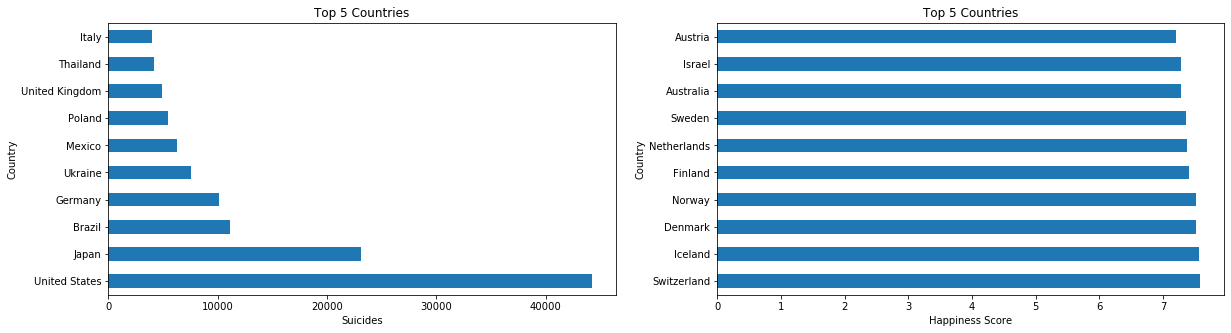

In [64]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
dataframe.groupby(['Country']).Suicides.sum().nlargest(10).plot(kind = 'barh')
plt.xlabel('Suicides')
plt.title('Top 5 Countries')
plt.subplot(1,2,2)
dataframe.groupby(['Country'])['Happiness Score'].sum().nlargest(10).plot(kind = 'barh')
plt.xlabel('Happiness Score')
plt.title('Top 5 Countries')
plt.show()

In above graph there is no country that matchs. So we can not say that happiness score effects suicides. Let's look at the correlations

In [65]:
dataframe_corr = dataframe[['Happiness Score', 'Suicides', 'Suicide Rate']].astype(float).corr()
dataframe_corr

,Happiness Score,Suicides,Suicide Rate
Happiness Score,1.000000,0.144831,0.035262
Suicides,0.144831,1.000000,0.155045
Suicide Rate,0.035262,0.155045,1.000000


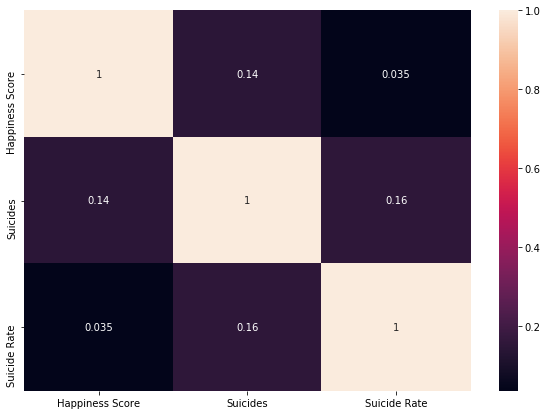

In [66]:
plt.figure(figsize = (10,7))
sns.heatmap(dataframe_corr, annot = True)
plt.show()

Suicides and happiness score is weakly correlated. This means that there is a connection between suicides and happiness of a country. But this connection is not a great connection. Even though the connection between happiness and suicides are not highly correlated, they effect each other.

# Conclusion
- We found that population increase increases suicides but not increase the suicide rate that much.
- We found that GDP per Capita is not increase the suicides when it decreases. But increase the suicide rate for a small amount.
- We fount that GDP for year is acctually increases the suicide numbers. But again do not increase the suicide rates.
- We found that the generation which have commited suicide the most is actually generation X includes 39-59 years old people.
- We found that males are more suicidal than females in every year from 1985 to 2016.
- We found that Economy (GDP per Capita), Family and Health (Life Expectancy) are the key points to become a happy country.
- And lastly we found that there was actually no connection between Happiness and the Suicide rate of a country.